In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_excel('/home/cheri/Pulpit/Studies/data_learning/Data_Train.xlsx')
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# Data pre-processing

In [7]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.index

RangeIndex(start=0, stop=10683, step=1)

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [1]:
train_data.describe()

NameError: name 'train_data' is not defined

In [11]:
train_data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [12]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.dropna(inplace=True)

In [14]:
data = train_data.copy()

In [15]:
def change_to_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [16]:
for i in ['Date_of_Journey']:
    change_to_datetime(i)

/home/cheri/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/cheri/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/cheri/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/cheri/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide 

In [17]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [18]:
train_data.drop('Date_of_Journey', axis =1, inplace = True)

In [19]:
for i in ['Dep_Time']:
    change_to_datetime(i)

In [20]:
for i in ['Arrival_Time']:
    change_to_datetime(i)

In [21]:
def extract_hour(df, col):
    df[col + '_hour']=df[col].dt.hour

def extract_minutes(df, col):
    df[col + '_minutes']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col, axis=1, inplace=True)

In [22]:
extract_hour(train_data, 'Dep_Time')
extract_minutes(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [23]:
train_data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

         Arrival_Time Duration Total_Stops Additional_Info  Price  \
0 2022-03-22 01:10:00   2h 50m    non-stop         No info   3897   
1 2022-06-21 13:15:00   7h 25m     2 stops         No info   7662   
2 2022-06-10 04:25:00      19h     2 stops         No info  13882   
3 2022-06-21 23:30:00   5h 25m      1 stop         No info   6218   
4 2022-06-21 21:35:00   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  Dep_Time_hour  Dep_Time_minutes  
0           24              3             22                20  
1            5              1              5                50  
2            6              9              9                25  
3            5             12             18                 5  
4            3              1             16                50

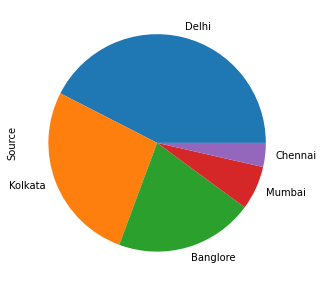

In [24]:
plot = train_data['Source'].value_counts().plot.pie(subplots=True, figsize=(10, 5))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

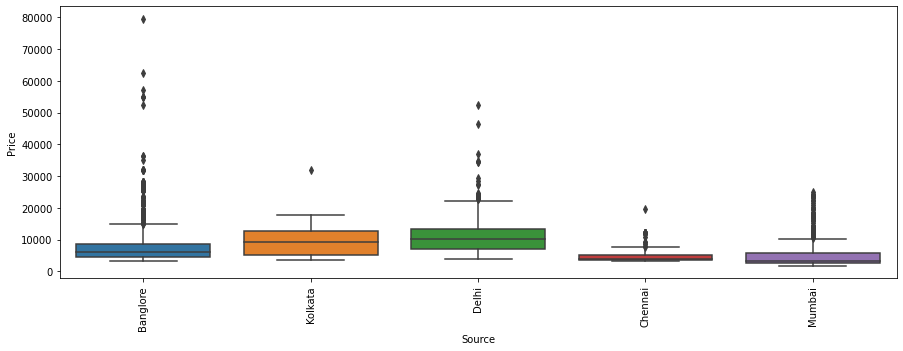

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=data)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

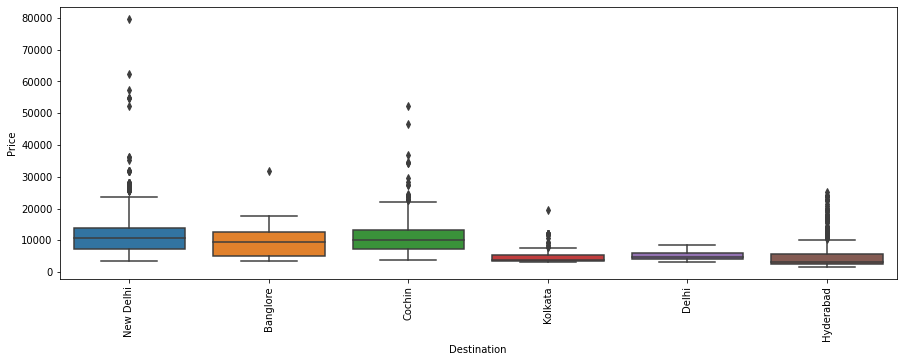

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Destination',data=data)
plt.xticks(rotation='vertical')

In [27]:
extract_hour(train_data, 'Arrival_Time')
extract_minutes(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [28]:
duration =list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h ' + duration[i]

In [29]:
train_data['Duration'] = duration

In [30]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [31]:
train_data['Duration_hours']= train_data['Duration'].apply(hour)
train_data['Duration_minutes'] = train_data['Duration'].apply(minute)

In [32]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_hours'].astype(int)

In [33]:
train_data['Duration_total_mins']=train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [34]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [35]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [36]:
cat_col

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [37]:
num_col

['Price']

# Airlines processing

In [38]:
airlines=train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [39]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [40]:
#dict1={key:index for index,key in enumerate(airlines,0)}

In [41]:
#data['Airline']

In [42]:
#data['Airline']=data['Airline'].map(dict1)

In [43]:
Airline=pd.get_dummies(train_data['Airline'], drop_first=True)

In [44]:
Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

# #Destination processing


In [45]:
Dest= pd.get_dummies(train_data['Destination'], drop_first=True)

In [46]:
Dest.head()

Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          0
2       1      0          0        0          0
3       0      0          0        0          0
4       0      0          0        0          1

In [47]:
#dict2={key:index for index,key in enumerate(dest,0)}

In [48]:
#data['Destination']=data['Destination'].map(dict2)

# Total Stops processing

In [49]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [50]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [51]:
data['Total_Stop']=data['Total_Stops'].map(stops)

In [52]:
data['Total_Stop']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stop, Length: 10682, dtype: int64

# Source processing

In [53]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
source = data.groupby(['Source'])['Price'].mean().sort_values().index

In [55]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [56]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [57]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Total_Stop  Source_Banglore  Source_Kolkata  Source_Delhi  Source_Chennai  \
0           0                1               0             0               0   
1           2                0               1             0               0   
2           2                0               0             1               0   
3           1                0               1             0               0   
4           1                1               0             0               0   

   Source_Mumbai  
0              0  
1              0  
2              0  
3              0  
4              0

# Routes processing

In [58]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [59]:
data['Route1']= data['Route'].str.split('→').str[0]
data['Route2']= data['Route'].str.split('→').str[1]
data['Route3']= data['Route'].str.split('→').str[2]
data['Route4']= data['Route'].str.split('→').str[3]
data['Route5']= data['Route'].str.split('→').str[4]

In [60]:
for i in ['Route3', 'Route4', 'Route5']:
    data[i].fillna('None', inplace=True)

In [61]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  ...  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  ...   
1    05:50         13:15   7h 25m     2 stops         No info  ...   
2    09:25  04:25 10 Jun      19h     2 stops         No info  ...   
3    18:05         23:30   5h 25m      1 stop         No info  ...   
4    16:50         21:35   4h 45m      1 stop         No info  ...   

   Source_Banglore  Source_Kolkata  Source_Delhi  Source_Chennai  \
0                1               0             0               0   
1                0               1             0               0   
2                0               0             1               0   
3                0               1             0               0   
4                1               0             0               0   

   Source_Mumbai  Route1  Route2 Route3 Route4 Route5  
0              0    BLR      DEL   None   None   None  
1              0    CCU     IXR    BBI     BLR   None  
2              0    DEL     LKO    BOM     COK   None  
3              0    CCU     NAG     BLR   None   None  
4              0    BLR     NAG     DEL   None   None  

[5 rows x 22 columns]

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()

In [64]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Total_Stop', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [65]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    data[i]=encoder.fit_transform(data[i])
    

In [66]:
drop_column(train_data, 'Price') #duplikat

# Concat the dfs

In [67]:
train_data = pd.concat([data, train_data, Dest, Airline], axis=1)

In [68]:
drop_column(train_data, 'Source')
drop_column(train_data, 'Destination')
drop_column(train_data, 'Route')
drop_column(train_data, 'Additional_Info')
drop_column(train_data, 'Duration')
drop_column(train_data, 'Date_of_Journey')
drop_column(train_data, 'Arrival_Time')
drop_column(train_data, 'Dep_Time')
drop_column(train_data, 'Duration_minutes')
drop_column(train_data, 'Total_Stops')
drop_column(train_data, 'Airline')

In [69]:
train_data.head()

Price  Total_Stop  Source_Banglore  Source_Kolkata  Source_Delhi  \
0   3897           0                1               0             0   
1   7662           2                0               1             0   
2  13882           2                0               0             1   
3   6218           1                0               1             0   
4  13302           1                1               0             0   

   Source_Chennai  Source_Mumbai  Route1  Route2  Route3  ...  GoAir  IndiGo  \
0               0              0       0      13      29  ...      0       1   
1               0              0       2      25       1  ...      0       0   
2               0              0       3      32       4  ...      0       0   
3               0              0       2      34       3  ...      0       1   
4               0              0       0      34       8  ...      0       1   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0            0                     0                  0   
1            0                     0                  0   
2            1                     0                  0   
3            0                     0                  0   
4            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  0         0       0        0   
1                                  0         0       0        0   
2                                  0         0       0        0   
3                                  0         0       0        0   
4                                  0         0       0        0   

   Vistara Premium economy  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 37 columns]

In [103]:
train_data.dtypes

Price                                float64
Total_Stop                             int64
Source_Banglore                        int64
Source_Kolkata                         int64
Source_Delhi                           int64
Source_Chennai                         int64
Source_Mumbai                          int64
Route1                                 int64
Route2                                 int64
Route3                                 int64
Route4                                 int64
Route5                                 int64
Journey_day                            int64
Journey_month                          int64
Dep_Time_hour                          int64
Dep_Time_minutes                       int64
Arrival_Time_hour                      int64
Arrival_Time_minutes                   int64
Duration_hours                         int64
Duration_mins                          int64
Duration_total_mins                    int64
Cochin                                 uint8
Delhi     

# Data analysis - visualization

In [70]:
train_data.describe()

Price    Total_Stop  Source_Banglore  Source_Kolkata  \
count  10682.000000  10682.000000     10682.000000    10682.000000   
mean    9087.214567      0.824190         0.205673        0.268770   
std     4611.548810      0.675229         0.404212        0.443341   
min     1759.000000      0.000000         0.000000        0.000000   
25%     5277.000000      0.000000         0.000000        0.000000   
50%     8372.000000      1.000000         0.000000        0.000000   
75%    12373.000000      1.000000         0.000000        1.000000   
max    79512.000000      4.000000         1.000000        1.000000   

       Source_Delhi  Source_Chennai  Source_Mumbai        Route1  \
count  10682.000000    10682.000000   10682.000000  10682.000000   
mean       0.424640        0.035667       0.065250      2.019378   
std        0.494311        0.185468       0.246978      1.206239   
min        0.000000        0.000000       0.000000      0.000000   
25%        0.000000        0.000000       0.000000      1.000000   
50%        0.000000        0.000000       0.000000      2.000000   
75%        1.000000        0.000000       0.000000      3.000000   
max        1.000000        1.000000       1.000000      4.000000   

             Route2        Route3  ...         GoAir        IndiGo  \
count  10682.000000  10682.000000  ...  10682.000000  10682.000000   
mean      11.897959     13.232166  ...      0.018161      0.192192   
std        8.006427     11.302632  ...      0.133541      0.394042   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        7.000000      4.000000  ...      0.000000      0.000000   
50%        8.000000      6.000000  ...      0.000000      0.000000   
75%       14.000000     29.000000  ...      0.000000      0.000000   
max       44.000000     29.000000  ...      1.000000      1.000000   

        Jet Airways  Jet Airways Business  Multiple carriers  \
count  10682.000000          10682.000000       10682.000000   
mean       0.360326              0.000562           0.111964   
std        0.480117              0.023695           0.315337   
min        0.000000              0.000000           0.000000   
25%        0.000000              0.000000           0.000000   
50%        0.000000              0.000000           0.000000   
75%        1.000000              0.000000           0.000000   
max        1.000000              1.000000           1.000000   

       Multiple carriers Premium economy      SpiceJet        Trujet  \
count                       10682.000000  10682.000000  10682.000000   
mean                            0.001217      0.076577      0.000094   
std                             0.034866      0.265932      0.009676   
min                             0.000000      0.000000      0.000000   
25%                             0.000000      0.000000      0.000000   
50%                             0.000000      0.000000      0.000000   
75%                             0.000000      0.000000      0.000000   
max                             1.000000      1.000000      1.000000   

            Vistara  Vistara Premium economy  
count  10682.000000             10682.000000  
mean       0.044842                 0.000281  
std        0.206966                 0.016757  
min        0.000000                 0.000000  
25%        0.000000                 0.000000  
50%        0.000000                 0.000000  
75%        0.000000                 0.000000  
max        1.000000                 1.000000  

[8 rows x 37 columns]

Text(0, 0.5, 'Number of flights ')

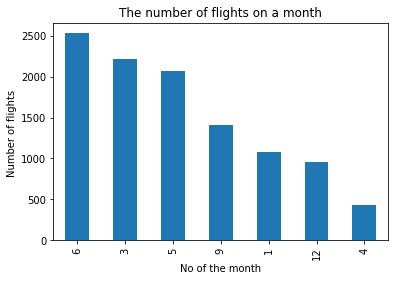

In [71]:
train_data['Journey_month'].value_counts().plot(kind="bar")
plt.title("The number of flights on a month")
plt.xlabel("No of the month")
plt.ylabel("Number of flights ")

Text(0, 0.5, 'Number of flights ')

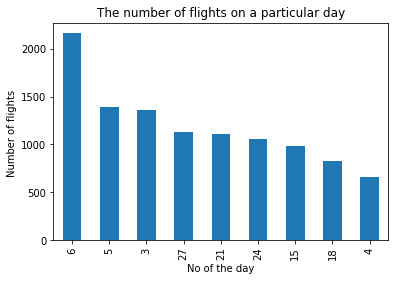

In [72]:
train_data['Journey_day'].value_counts().plot(kind="bar")
plt.title("The number of flights on a particular day")
plt.xlabel("No of the day")
plt.ylabel("Number of flights ")

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

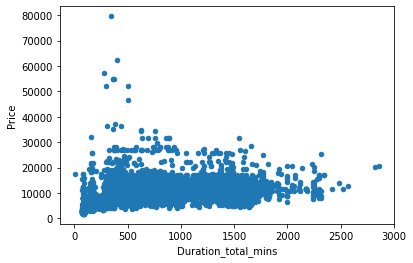

In [73]:
train_data.plot(x='Duration_total_mins', y='Price', kind='scatter')

<AxesSubplot:xlabel='Total_Stop', ylabel='Price'>

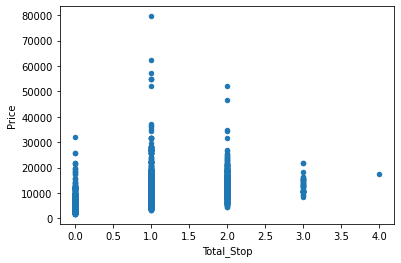

In [74]:
train_data.plot(x='Total_Stop', y='Price', kind='scatter')

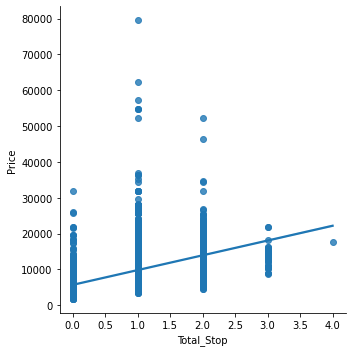

In [75]:
sns.lmplot(x='Total_Stop',y='Price',data=train_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

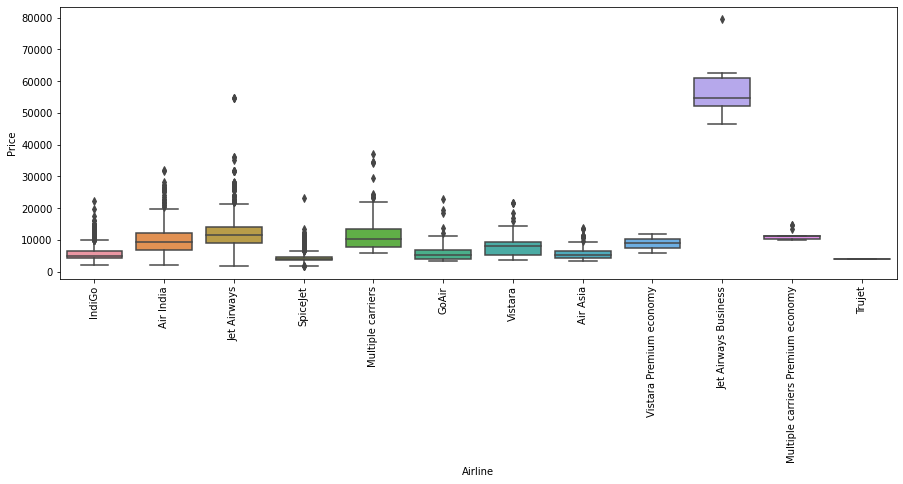

In [76]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [79]:
def plot(df, col):
    fig,(ax1)=plt.subplots(1)
    sns.histplot(df[col],kde=True, stat="density", linewidth=0)

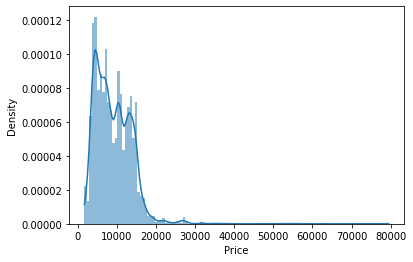

In [80]:
plot(train_data, 'Price')

In [81]:
train_data['Price']= np.where(train_data['Price']>=40000, train_data['Price'].median(),train_data['Price'])

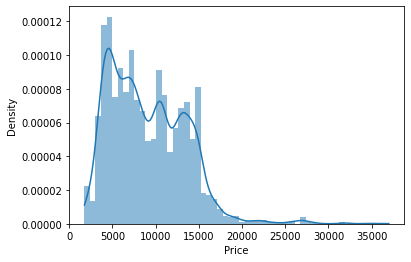

In [82]:
plot(train_data, 'Price')

# Classify

In [85]:
X=train_data.drop('Price', axis =1)
X.head()

Total_Stop  Source_Banglore  Source_Kolkata  Source_Delhi  Source_Chennai  \
0           0                1               0             0               0   
1           2                0               1             0               0   
2           2                0               0             1               0   
3           1                0               1             0               0   
4           1                1               0             0               0   

   Source_Mumbai  Route1  Route2  Route3  Route4  ...  GoAir  IndiGo  \
0              0       0      13      29      13  ...      0       1   
1              0       2      25       1       3  ...      0       0   
2              0       3      32       4       5  ...      0       0   
3              0       2      34       3      13  ...      0       1   
4              0       0      34       8      13  ...      0       1   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0            0                     0                  0   
1            0                     0                  0   
2            1                     0                  0   
3            0                     0                  0   
4            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  0         0       0        0   
1                                  0         0       0        0   
2                                  0         0       0        0   
3                                  0         0       0        0   
4                                  0         0       0        0   

   Vistara Premium economy  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 36 columns]

In [86]:
y= train_data['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [87]:
from sklearn.feature_selection import mutual_info_classif

In [91]:
mutual_info_classif(X,y)

array([2.15878608, 0.69150172, 0.88126526, 1.50941054, 0.16727626,
       0.29367786, 2.06405106, 2.76225258, 2.27441356, 1.49523576,
       0.77903733, 1.07688983, 0.90625857, 1.44173049, 1.20948429,
       1.82313113, 1.50030384, 1.79559343, 1.78293714, 2.3621512 ,
       1.50807692, 0.3953482 , 0.27386802, 0.16468488, 0.37245601,
       0.77205164, 0.103498  , 0.69630633, 0.89889184, 0.01326299,
       0.54653667, 0.01571274, 0.32951635, 0.        , 0.22700621,
       0.        ])

In [92]:
imp = pd.DataFrame(mutual_info_classif(X,y), index =X.columns)

In [109]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)

importance
Route2                               2.783520
Duration_total_mins                  2.374132
Route3                               2.309332
Total_Stop                           2.111439
Route1                               2.033273
Arrival_Time_hour                    1.866596
Duration_hours                       1.789554
Duration_mins                        1.786283
Cochin                               1.542387
Source_Delhi                         1.539488
Arrival_Time_minutes                 1.529546
Route4                               1.445325
Dep_Time_hour                        1.408355
Dep_Time_minutes                     1.216861
Journey_day                          1.069922
Jet Airways                          0.920381
Source_Kolkata                       0.876176
Journey_month                        0.822969
Route5                               0.768106
Air India                            0.762680
Source_Banglore                      0.699300
IndiGo                               0.664209
Multiple carriers                    0.546748
Delhi                                0.406730
New Delhi                            0.374718
SpiceJet                             0.318793
Source_Mumbai                        0.291239
Hyderabad                            0.280209
Vistara                              0.214543
Kolkata                              0.174498
Source_Chennai                       0.161548
GoAir                                0.087085
Vistara Premium economy              0.012165
Multiple carriers Premium economy    0.008945
Jet Airways Business                 0.001399
Trujet                               0.000000

<AxesSubplot:>

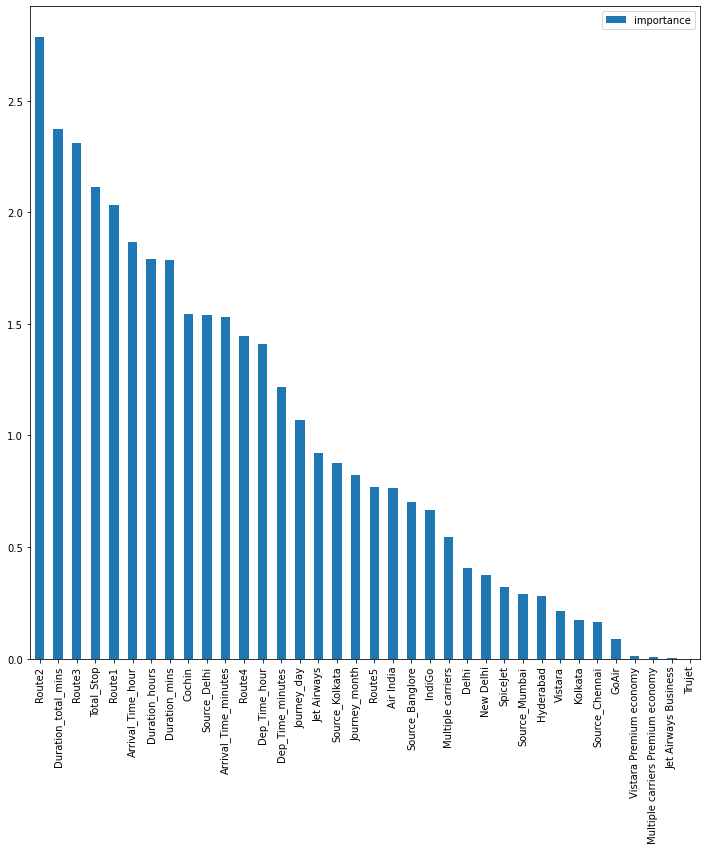

In [112]:
imp.sort_values(by='importance', ascending=False).plot(kind="bar", figsize=(12,12) )


# Create a model

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
from sklearn import metrics

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [117]:
y_test

501      2227.0
1742    13377.0
7664    13555.0
4845     2575.0
923      6535.0
         ...   
2036    17261.0
5485    10844.0
4994    13292.0
662     14714.0
7292     1965.0
Name: Price, Length: 2137, dtype: float64

In [124]:
def prediction(ml_model):
    model=ml_model.fit(X_train, y_train)
    print("Training score: {}".format(model.score(X_train, y_train)))
    predictions=model.predict(X_test)
    print('predictions:{}'.format(predictions))
    print('\n')
    r2_score=metrics.r2_score(y_test, predictions)
    print('r2 score: {}'.format(r2_score))
    
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    sns.displot(y_test-predictions)
    
    

In [125]:
from sklearn.ensemble import RandomForestRegressor

Training score: 0.9551091099523559
predictions:[ 2298.69        8201.37466667 13967.703      ... 11883.272
 11333.2915      2014.57333333]


r2 score: 0.8179494121144179
MAE: 1169.614110369353
MSE: 3517598.1940177833
RMSE: 1875.526111259927


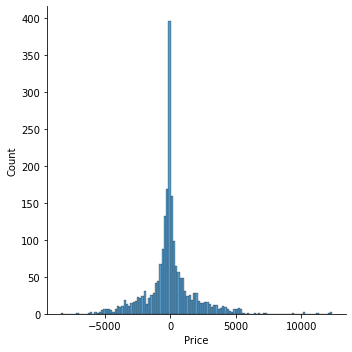

In [126]:
prediction(RandomForestRegressor())